**DOWNLOAD LIBRARY**

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=61567776bc51c02e92a00be621e36ea52c4ba6e5cae1ffeb9f3ee38dbfdb620b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install wordcloud

**LIBRARY YANG DIGUNAKAN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
import gensim
import pickle
from pathlib import Path
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**LIHAT DATA**

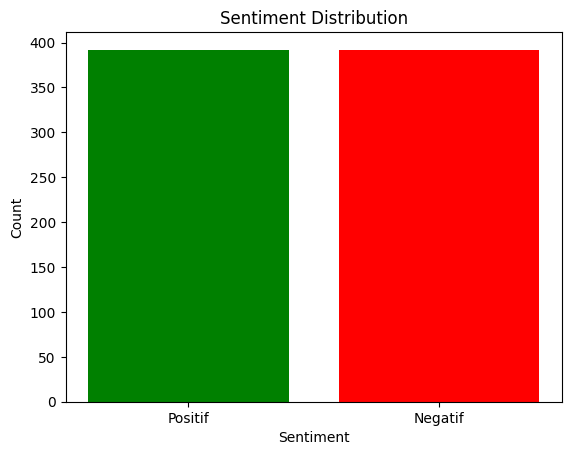

In [ ]:
ulasan = pd.read_csv('bagi_sama_pinterest.csv')

positive_count = ulasan[ulasan['label'] == 'Positif'].shape[0]
negative_count = ulasan[ulasan['label'] == 'Negatif'].shape[0]

labels = ['Positif', 'Negatif']
counts = [positive_count, negative_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

**CEK NULL**

In [ ]:
ulasan.isnull().sum()

dated     0
rating    0
label     0
review    0
dtype: int64

**CLEANING DATA**

In [ ]:
def cleaning_ulasan(ulasan):
    ulasan = re.sub(r'@[A-Za-a0-9]+', ' ', ulasan)
    ulasan = re.sub(r'#[A-Za-z0-9]+', ' ', ulasan)
    ulasan = re.sub(r"http\S+", ' ', ulasan)
    ulasan = re.sub(r'[0-9]+', ' ', ulasan)
    ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
    ulasan = ulasan.strip(' ')
    return ulasan
ulasan['cleaning'] = ulasan['review'].apply(cleaning_ulasan)

def clear_emoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['hapusEmoji'] = ulasan['cleaning'].apply(clear_emoji)

def double(ulasan):
    pattern = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pattern.sub(r'\1', ulasan)
ulasan['double'] = ulasan['hapusEmoji'].apply(double)
ulasan

,dated,rating,label,review,cleaning,hapusEmoji,double
0,2024-04-28 11:34:44,1,Negatif,"ini apk lama' aneh, udh jelas' jaringan nya KU...",ini apk lama aneh udh jelas jaringan nya KU...,ini apk lama aneh udh jelas jaringan nya KU...,ini apk lama aneh udh jelas jaringan nya KU...
1,2024-04-27 07:04:30,1,Negatif,"Pas masukin tanggal lahir kok gak bisa"" bahkan...",Pas masukin tanggal lahir kok gak bisa bahkan...,Pas masukin tanggal lahir kok gak bisa bahkan...,Pas masukin tanggal lahir kok gak bisa bahkan...
2,2024-04-27 02:13:40,2,Negatif,"Aplikasi ini membuat sy tidak nyaman ,masa fot...",Aplikasi ini membuat sy tidak nyaman masa fot...,Aplikasi ini membuat sy tidak nyaman masa fot...,Aplikasi ini membuat sy tidak nyaman masa fot...
3,2024-04-27 01:46:58,1,Negatif,"Banyak gambar yg tidak bisa diunduh, setelah s...",Banyak gambar yg tidak bisa diunduh setelah s...,Banyak gambar yg tidak bisa diunduh setelah s...,Banyak gambar yg tidak bisa diunduh setelah s...
4,2024-04-27 01:12:03,1,Negatif,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...
...,...,...,...,...,...,...,...
779,2019-02-13 01:33:21,5,Positif,sebenarnya baik .. cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ini...
780,2019-02-12 17:27:39,1,Negatif,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...
781,2019-02-12 10:57:13,5,Positif,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...
782,2018-11-03 06:37:15,5,Positif,"Aku suka banget pake pinterest, kalau mau nyar...",Aku suka banget pake pinterest kalau mau nyar...,Aku suka banget pake pinterest kalau mau nyar...,Aku suka banget pake pinterest kalau mau nyar...


**CASEFOLDING**

In [ ]:
def case_folding_text(ulasan):
    return ulasan.lower()
ulasan['caseFolding'] = ulasan['double'].apply(case_folding_text)
ulasan['caseFolding']

0      ini apk lama  aneh  udh jelas  jaringan nya ku...
1      pas masukin tanggal lahir kok gak bisa  bahkan...
2      aplikasi ini membuat sy tidak nyaman  masa fot...
3      banyak gambar yg tidak bisa diunduh  setelah s...
4      kntl gak bisa udah bener tanggal lahir nya mal...
                             ...                        
779    sebenarnya baik cuman untuk pembaruan kali ini...
780    untuk versi ini kenapa gambar tidak bisa di do...
781    buat yang abis di update trus nggak bisa kesim...
782    aku suka banget pake pinterest  kalau mau nyar...
783    the best lah  tapi saran aja  buatin tombol do...
Name: caseFolding, Length: 784, dtype: object

**TOKENIZING**

In [ ]:
def tokenizing_text(ulasan):
    return word_tokenize(ulasan)
ulasan['tokenizing'] = ulasan['caseFolding'].apply(tokenizing_text)
ulasan['tokenizing']

0      [ini, apk, lama, aneh, udh, jelas, jaringan, n...
1      [pas, masukin, tanggal, lahir, kok, gak, bisa,...
2      [aplikasi, ini, membuat, sy, tidak, nyaman, ma...
3      [banyak, gambar, yg, tidak, bisa, diunduh, set...
4      [kntl, gak, bisa, udah, bener, tanggal, lahir,...
                             ...                        
779    [sebenarnya, baik, cuman, untuk, pembaruan, ka...
780    [untuk, versi, ini, kenapa, gambar, tidak, bis...
781    [buat, yang, abis, di, update, trus, nggak, bi...
782    [aku, suka, banget, pake, pinterest, kalau, ma...
783    [the, best, lah, tapi, saran, aja, buatin, tom...
Name: tokenizing, Length: 784, dtype: object

**FORMALISASI**

In [ ]:
def convert_to_slangword(ulasan):
    kamus_slang = eval(open("kata_gaul.txt").read())
    pattern = re.compile(r'\b(' + '|'.join(kamus_slang.keys()) + r')\b')
    content = []
    for kata in ulasan:
        filter_slang = pattern.sub(lambda x: kamus_slang[x.group()], kata)
        content.append(filter_slang.lower())
    ulasan = content
    return ulasan
ulasan['formalisasi'] = ulasan['tokenizing'].apply(convert_to_slangword)
ulasan['formalisasi']

0      [ini, aplikasi, lama, aneh, udah, jelas, jarin...
1      [saat, masukin, tanggal, lahir, kok, gak, bisa...
2      [aplikasi, ini, membuat, saya, tidak, nyaman, ...
3      [banyak, gambar, yang, tidak, bisa, diunduh, s...
4      [sialan, gak, bisa, udah, bener, tanggal, lahi...
                             ...                        
779    [sebenarnya, baik, cuman, untuk, pembaruan, ka...
780    [untuk, versi, ini, kenapa, gambar, tidak, bis...
781    [buat, yang, abis, di, update, trus, nggak, bi...
782    [aku, suka, banget, pake, pinterest, kalau, ma...
783    [the, best, lah, tapi, saran, aja, buatin, tom...
Name: formalisasi, Length: 784, dtype: object

**STOPWORD REMOVAL**

In [ ]:
daftar_stopword = stopwords.words('indonesian')
daftar_stopword = set(daftar_stopword)
def stopword_text(words):
    return [word for word in words if word not in daftar_stopword]

ulasan['stopwordRemoval'] = ulasan['formalisasi'].apply(stopword_text)
ulasan['stopwordRemoval']

0      [aplikasi, aneh, udah, jaringan, nya, kuat, do...
1      [masukin, tanggal, lahir, gak, mencoba, aplikasi]
2      [aplikasi, nyaman, foto, foto, ambil, pin, gak...
3      [gambar, diunduh, update, mengunduh, gambar, n...
4      [sialan, gak, udah, bener, tanggal, lahir, nya...
                             ...                        
779    [cuman, pembaruan, kali, tolong, perbaiki, sav...
780    [versi, gambar, download, pilih, menu, downloa...
781    [abis, update, trus, nggak, kesimpen, gambarny...
782    [suka, banget, pake, pinterest, nyari, inspira...
783    [the, best, saran, aja, buatin, tombol, downlo...
Name: stopwordRemoval, Length: 784, dtype: object

**STEMMING**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}

for document in ulasan['stopwordRemoval']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ''

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

def stemming_text(document):
    return [term_dict[term] for term in document]
ulasan['stemming'] = ulasan['stopwordRemoval'].apply(stemming_text)
ulasan['stemming']

0      [aplikasi, aneh, udah, jaring, nya, kuat, down...
1         [masukin, tanggal, lahir, gak, coba, aplikasi]
2      [aplikasi, nyaman, foto, foto, ambil, pin, gak...
3      [gambar, unduh, update, unduh, gambar, nya, me...
4      [sial, gak, udah, bener, tanggal, lahir, nya, ...
                             ...                        
779    [cuman, baru, kali, tolong, baik, save, bentuk...
780    [versi, gambar, download, pilih, menu, downloa...
781    [abis, update, trus, nggak, kesimpen, gambar, ...
782    [suka, banget, pake, pinterest, nyari, inspira...
783    [the, best, saran, aja, buatin, tombol, downlo...
Name: stemming, Length: 784, dtype: object

**HASIL SELURUH PREPROCESSING**

In [ ]:
ulasan

,dated,rating,label,review,cleaning,hapusEmoji,double,caseFolding,tokenizing,formalisasi,stopwordRemoval,stemming
0,2024-04-28 11:34:44,1,Negatif,"ini apk lama' aneh, udh jelas' jaringan nya KU...",ini apk lama aneh udh jelas jaringan nya KU...,ini apk lama aneh udh jelas jaringan nya KU...,ini apk lama aneh udh jelas jaringan nya KU...,ini apk lama aneh udh jelas jaringan nya ku...,"[ini, apk, lama, aneh, udh, jelas, jaringan, n...","[ini, aplikasi, lama, aneh, udah, jelas, jarin...","[aplikasi, aneh, udah, jaringan, nya, kuat, do...","[aplikasi, aneh, udah, jaring, nya, kuat, down..."
1,2024-04-27 07:04:30,1,Negatif,"Pas masukin tanggal lahir kok gak bisa"" bahkan...",Pas masukin tanggal lahir kok gak bisa bahkan...,Pas masukin tanggal lahir kok gak bisa bahkan...,Pas masukin tanggal lahir kok gak bisa bahkan...,pas masukin tanggal lahir kok gak bisa bahkan...,"[pas, masukin, tanggal, lahir, kok, gak, bisa,...","[saat, masukin, tanggal, lahir, kok, gak, bisa...","[masukin, tanggal, lahir, gak, mencoba, aplikasi]","[masukin, tanggal, lahir, gak, coba, aplikasi]"
2,2024-04-27 02:13:40,2,Negatif,"Aplikasi ini membuat sy tidak nyaman ,masa fot...",Aplikasi ini membuat sy tidak nyaman masa fot...,Aplikasi ini membuat sy tidak nyaman masa fot...,Aplikasi ini membuat sy tidak nyaman masa fot...,aplikasi ini membuat sy tidak nyaman masa fot...,"[aplikasi, ini, membuat, sy, tidak, nyaman, ma...","[aplikasi, ini, membuat, saya, tidak, nyaman, ...","[aplikasi, nyaman, foto, foto, ambil, pin, gak...","[aplikasi, nyaman, foto, foto, ambil, pin, gak..."
3,2024-04-27 01:46:58,1,Negatif,"Banyak gambar yg tidak bisa diunduh, setelah s...",Banyak gambar yg tidak bisa diunduh setelah s...,Banyak gambar yg tidak bisa diunduh setelah s...,Banyak gambar yg tidak bisa diunduh setelah s...,banyak gambar yg tidak bisa diunduh setelah s...,"[banyak, gambar, yg, tidak, bisa, diunduh, set...","[banyak, gambar, yang, tidak, bisa, diunduh, s...","[gambar, diunduh, update, mengunduh, gambar, n...","[gambar, unduh, update, unduh, gambar, nya, me..."
4,2024-04-27 01:12:03,1,Negatif,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...,Kntl gak bisa udah bener tanggal lahir nya mal...,kntl gak bisa udah bener tanggal lahir nya mal...,"[kntl, gak, bisa, udah, bener, tanggal, lahir,...","[sialan, gak, bisa, udah, bener, tanggal, lahi...","[sialan, gak, udah, bener, tanggal, lahir, nya...","[sial, gak, udah, bener, tanggal, lahir, nya, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
779,2019-02-13 01:33:21,5,Positif,sebenarnya baik .. cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ...,sebenarnya baik cuman untuk pembaruan kali ini...,sebenarnya baik cuman untuk pembaruan kali ini...,"[sebenarnya, baik, cuman, untuk, pembaruan, ka...","[sebenarnya, baik, cuman, untuk, pembaruan, ka...","[cuman, pembaruan, kali, tolong, perbaiki, sav...","[cuman, baru, kali, tolong, baik, save, bentuk..."
780,2019-02-12 17:27:39,1,Negatif,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,untuk versi ini kenapa gambar tidak bisa di do...,"[untuk, versi, ini, kenapa, gambar, tidak, bis...","[untuk, versi, ini, kenapa, gambar, tidak, bis...","[versi, gambar, download, pilih, menu, downloa...","[versi, gambar, download, pilih, menu, downloa..."
781,2019-02-12 10:57:13,5,Positif,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,buat yang abis di update trus nggak bisa kesim...,"[buat, yang, abis, di, update, trus, nggak, bi...","[buat, yang, abis, di, update, trus, nggak, bi...","[abis, update, trus, nggak, kesimpe

**BAGI DATA**

In [ ]:
X = ulasan['stemming']
Y = ulasan['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=64)

x_train_text = [' '.join(tokens) for tokens in x_train]
x_test_text = [' '.join(tokens) for tokens in x_test]

**TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, max_features=2000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_text)
x_test_tfidf = tfidf_vectorizer.transform(x_test_text)

print("Panjang x_train_tfidf: ", x_train_tfidf.shape)
print("Panjang x_test_tfidf: ", x_test_tfidf.shape)

Panjang x_train_tfidf:  (627, 1547)
Panjang x_test_tfidf:  (157, 1547)


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)
print("TF-IDF untuk x_train:")
print(x_train_tfidf_df)

x_test_tfidf_df = pd.DataFrame(x_test_tfidf.toarray(), columns=feature_names)
print("TF-IDF untuk x_test:")
print(x_test_tfidf_df)

TF-IDF untuk x_train:
     aaman  abad  abis  abistu  acak  acc  adil  admin  aehstetik  aeshtetick  \
0      0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
1      0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
2      0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
3      0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
4      0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
..     ...   ...   ...     ...   ...  ...   ...    ...        ...         ...   
622    0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
623    0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
624    0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
625    0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   
626    0.0   0.0   0.0     0.0   0.0  0.0   0.0    0.0        0.0         0.0   

     

**WORD2VEC**

In [ ]:
model_w2v = gensim.models.Word2Vec(
    sentences=ulasan['stemming'],
    vector_size=400,
    window=5,
    min_count=2,
    sg=1,
    hs=0,
    negative=10,
    workers=2,
    seed=34,
    epochs=20,
    alpha=0.04,
    min_alpha=0.0006
)

model_w2v.train(ulasan['stemming'], total_examples=len(ulasan['stemming']), epochs=20)

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

x_train_word2vec = np.concatenate([word_vector(tokens, 400) for tokens in x_train])
x_test_word2vec = np.concatenate([word_vector(tokens, 400) for tokens in x_test])

print("Dimensi x_train_word2vec: ", x_train_word2vec.shape)
print("Dimensi x_test_word2vec: ", x_test_word2vec.shape)

np.save('x_train_word2vec.npy', x_train_word2vec)
np.save('x_test_word2vec.npy', x_test_word2vec)

Dimensi x_train_word2vec:  (627, 400)
Dimensi x_test_word2vec:  (157, 400)


**SVM TF-IDF DENGAN K-FOLD CROSS VALIDATION**

In [ ]:
param_grid = {
    'C': [0.01, 0.05, 0.25, 0.5, 0.75, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

sv_tfidf = SVC()
grid_search = GridSearchCV(sv_tfidf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
best_accuracy_tfidf = grid_search.best_score_
print(f"Parameter terbaik: {best_params}")
print(f"Akurasi terbaik: {best_accuracy_tfidf}")

sv_tfidf_best = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
sv_tfidf_best.fit(x_train_tfidf, y_train)

print("\nClassification Report for TF-IDF with Best Parameters:")
print(classification_report(y_test, sv_tfidf_best.predict(x_test_tfidf)))

Parameter terbaik: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Akurasi terbaik: 0.8483809523809522

Classification Report for TF-IDF with Best Parameters:
              precision    recall  f1-score   support

     Negatif       0.81      0.83      0.82        76
     Positif       0.84      0.81      0.82        81

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.82      0.82      0.82       157



**SVM WORD2VEC DENGAN K-FOLD CROSS VALIDATION**

In [ ]:
param_grid = {
    'C': [0.01, 0.05, 0.25, 0.5, 0.75, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

sv_word2vec = SVC()
grid_search = GridSearchCV(sv_word2vec, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train_word2vec, y_train)

best_params = grid_search.best_params_
best_accuracy_word2vec = grid_search.best_score_
print(f"Parameter terbaik: {best_params}")
print(f"Akurasi terbaik: {best_accuracy_word2vec}")

sv_word2vec_best = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
sv_word2vec_best.fit(x_train_word2vec, y_train)

print("\nClassification Report for Word2Vec with Best Parameters:")
print(classification_report(y_test, sv_word2vec_best.predict(x_test_word2vec)))

Parameter terbaik: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Akurasi terbaik: 0.8453661034306196

Classification Report for Word2Vec with Best Parameters:
              precision    recall  f1-score   support

     Negatif       0.84      0.87      0.85        76
     Positif       0.87      0.84      0.86        81

    accuracy                           0.85       157
   macro avg       0.85      0.85      0.85       157
weighted avg       0.85      0.85      0.85       157



**UBAH KE PICKLE**

In [ ]:
with open('model_word2vec.pkl', 'wb') as f:
    pickle.dump(model_w2v, f)

with open('model_svm_word2vec.pkl', 'wb') as f:
    pickle.dump(sv_word2vec_best, f)